In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import QuantileTransformer
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score
import sklearn
from sklearn.preprocessing import *
pd.set_option('mode.chained_assignment',  None) 
def temp_sensible(dataframe):
    #체감온도 공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T
    #출처:https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/
    temp_df_t=dataframe['temp_mean'].tolist()
    temp_df_w=dataframe['wind_mean'].tolist()
    temp_df_t
    temp_df_w
    result_=[]
    for i in range(len(temp_df_t)):
        result=13.12+0.6215*temp_df_t[i]-11.37*math.pow(temp_df_w[i],0.16)+0.3965*math.pow(temp_df_w[i],0.16)*temp_df_t[i]
        result_.append(round(result,1))
    dataframe.insert(4,'temp_sensible',result_)

def discomfort_index(dataframe):
    
    #0.81 * temp_df_t[i] +0.01 * temp_df_t[i]*((0.99*temp_df_t[i]) - 14.3)+ 46.3
    #불쾌지수 공식(80이상 : 매우 불쾌, 80~75: 50%불쾌 , 68~75 :불쾌감 시작, 68미만: 쾌적함)
    #discomfort_index
    temp_df_t=dataframe['temp_mean'].tolist()
    temp_df_h=dataframe['humidity'].tolist()
    temp_df_t
    temp_df_h

    result_=[]
    for i in range(len(temp_df_t)):
        result=(9/5*temp_df_t[i])-0.55*(1-temp_df_h[i]/100)*(9/5*temp_df_t[i]-26)+32
        result_.append(round(result,1))
    result_
    dataframe['discomfort_index']=result_


def pm_trafficlight(dataframe):
    pm10=dataframe['PM10'].tolist()
    pm2=dataframe['PM2.5'].tolist()
    pm_=[]
    for i in range(len(pm10)):
        if(pm10[i]<=30 or pm2[i]<=15):
            pm_.append(1)
        elif((pm10[i]<=80 and pm10[i]>30) or (pm2[i] >=16 and pm2[i]<=50)):
            pm_.append(2)
        elif((pm10[i]<=150 and pm10[i]>80)or (pm2[i]>50 and pm2[i]<=100)):
            pm_.append(3)
        elif(pm10[i]>=150 or (pm2[i]>100)):
            pm_.append(4)
    dataframe['pm']=pm_

def rental_rate(dataframe):
    y1 = dataframe[dataframe['year'] == 2018]['rental'] * 2.3
    y2 = dataframe[dataframe['year'] == 2019]['rental'] * 1.2
    y3 = dataframe[dataframe['year'] == 2020]['rental']
    new = pd.concat([y1, y2, y3], axis=0).to_frame()
    dataframe['rental'] = new['rental']
    return True




def seperate_datetime(dataframe):
    week_list = []
    year = []
    month = []
    for date in dataframe.date:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point) - 2017)
        month.append(int(month_point))
    dataframe['year'] = year
    dataframe['month'] = month
    for day in dataframe['date']:
        num = pd.date_range(day, day, freq='D').to_series()
        week_list.append(int(num.dt.dayofweek[0]))
    dataframe['day'] = week_list
    dataframe = dataframe.drop(['date'], axis=1)
    return dataframe

def enter_week(dataframe):
    w_list = [1.02,1.02, 0.97, 0.95, 1.02, 1.01, 1.02]
    #corr 해서 상관관계에 따라 비율 설정 
    for i in range(0, 7):
        dataframe[dataframe['day'] == i] *= w_list[i]
        
clist =['pm_2', 'temp_diff', 'temp_ratio', 'temp_highest', 'temp_sensible', 'wind_mean', 'pm_1', 'temp_lowest', 'PM2.5', 'PM10']



In [2]:
sample = pd.read_csv('sample_submission.csv')
sample
test_df = pd.read_csv('test.csv')
test_df
train = pd.read_csv('train.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
test_date = test_df['date']



In [3]:
date=train['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list_=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list_[i]
        
        elif(i==1):
            month_+=list_[i]
        elif(i==2):
            day_+=list_[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
train_=train.drop(columns='date')
train_['year']=year
train_['month']=month
train_['day']=day

train_['precipitation']=train_['precipitation'].fillna(0)
train_['PM10'] = train_['PM10'].fillna(train_['PM10'].mean())
train_['PM2.5'] = train_['PM2.5'].fillna(train_['PM2.5'].mean())
train_ = train_.fillna(train_.mean())
rental_rate(train_)
train_.isnull().sum()

precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
rental           0
year             0
month            0
day              0
dtype: int64

In [4]:

day = []

for i in range(0,614):
    if train_.index[i] % 7 == 0:
        day.append("Monday")
    elif train_.index[i] % 7 == 1:
        day.append("Tuesday")
    elif train_.index[i] % 7 ==2:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 3:
        day.append("Thursday")
    elif train_.index[i] % 7 == 4:
        day.append("Friday")
    elif train_.index[i] % 7 == 5:
        day.append("Saturday")
    elif train_.index[i] % 7 == 6:
        day.append("Sunday")
        
for i in range(0,len(train_.day)-614):
    if train_.index[i] % 7 == 0:
        day.append("Sunday")
    elif train_.index[i] % 7 == 1:
        day.append("Monday")
    elif train_.index[i] % 7 == 2:
        day.append("Tuesday")
    elif train_.index[i] % 7 == 3:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 4:
        day.append("Thursday")
    elif train_.index[i] % 7 == 5:
        day.append("Friday")
    elif train_.index[i] % 7 == 6:
        day.append("Saturday")
 

train_["day_name"] = day
train_= pd.get_dummies(data = train_,columns = ['day_name'])
train_["rental"] = np.log1p(train_["rental"])
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precipitation       1095 non-null   float64
 1   temp_mean           1095 non-null   float64
 2   temp_highest        1095 non-null   float64
 3   temp_lowest         1095 non-null   float64
 4   PM10                1095 non-null   float64
 5   PM2.5               1095 non-null   float64
 6   humidity            1095 non-null   float64
 7   sunshine_sum        1095 non-null   float64
 8   sunshine_rate       1095 non-null   float64
 9   wind_mean           1095 non-null   float64
 10  wind_max            1095 non-null   float64
 11  rental              1095 non-null   float64
 12  year                1095 non-null   int64  
 13  month               1095 non-null   int64  
 14  day                 1095 non-null   int64  
 15  day_name_Friday     1095 non-null   uint8  
 16  day_na

In [5]:
date=test_df['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list_=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list_[i]
        
        elif(i==1):
            month_+=list_[i]
        elif(i==2):
            day_+=list_[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
test_df=test_df.drop(columns='date')
test_df['year']=year
test_df['month']=month
test_df['day']=day
test_df
test_df['precipitation']=test_df['precipitation'].fillna(0)
print(test_df.isnull().sum())

test_df['PM10'] = test_df['PM10'].fillna(test_df['PM10'].mean())
test_df['PM2.5'] = test_df['PM2.5'].fillna(test_df['PM2.5'].mean())
test_df=test_df.fillna(test_df.mean())

precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     1
sunshine_rate    0
wind_mean        0
wind_max         0
year             0
month            0
day              0
dtype: int64


In [6]:
day2= []

for i in range(0,365):
    if test_df.index[i] % 7 == 0:
        day2.append("Friday")
    elif test_df.index[i] % 7 == 1:
        day2.append("Saturday")
    elif test_df.index[i] % 7 ==2:
        day2.append("Sunday")
    elif test_df.index[i] % 7 == 3:
        day2.append("Monday")
    elif test_df.index[i] % 7 == 4:
        day2.append("Tuesday")
    elif test_df.index[i] % 7 == 5:
        day2.append("Wednesday")
    elif test_df.index[i] % 7 == 6:
        day2.append("Thursday")

test_df["day_name"] = day2
test_df
test_df = pd.get_dummies(data = test_df,columns = ["day_name"])


In [7]:
discomfort_index(train_)
temp_sensible(train_)
discomfort_index(test_df)
temp_sensible(test_df)
#일교차
train_.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])
test_df.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])
#미세먼지 신호등
pm_trafficlight(train_)
pm_trafficlight(test_df)

In [8]:
train_[(train_['rental']>=np.log1p(100000))&(train_['rental']<=np.log1p(140000))][['precipitation','temp_mean','PM10','PM2.5','rental']].head(50)


,precipitation,temp_mean,PM10,PM2.5,rental
154,0.0,22.6,36.000000,24.000000,11.525182
155,0.0,23.7,32.000000,22.000000,11.527542
158,0.0,21.9,36.051556,21.532619,11.580470
162,0.0,21.3,36.051556,21.532619,11.573675
163,0.0,22.0,36.051556,21.532619,11.634858
165,16.5,21.7,36.051556,21.532619,11.549623
166,0.0,22.5,36.051556,21.532619,11.579201
167,0.0,22.8,36.051556,21.532619,11.513067
169,0.0,22.4,36.051556,21.532619,11.597099
170,0.0,22.7,36.051556,21.532619,11.582532


In [9]:
scaler1 = QuantileTransformer()
scaler2 = QuantileTransformer()
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum']
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean','wind_max']
col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation']
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean'
#               ,'wind_max','temp_mean','temp_highest','temp_lowest','humidity']

# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean'
#               ,'wind_max','humidity']
# col___list = bicycle.columns
scaler1.fit(train_[col___list])
X_train_scaled = scaler1.transform(train_[col___list])
train_[col___list] =X_train_scaled
scaler2.fit(test_df[col___list])
X_train_scaled = scaler2.transform(test_df[col___list])
test_df[col___list] =X_train_scaled


/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (365). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [10]:
#미세먼지 onehot


#y = train_['rental']
#train_ = train_.drop(['rental'], axis=1)

train_ = pd.get_dummies(data = train_,columns = ['pm'])
test_df = pd.get_dummies(data = test_df,columns = ['pm'])
test_df['pm_4']=0.0
test_df['pm_4']=test_df['pm_4'].astype('uint8')
train_['dust'] = train_['PM10'] * train_['PM2.5']
train_['temp_ratio'] = abs(train_['temp_highest'] - train_['temp_lowest'])
train_['daytime'] = train_['sunshine_rate'] / train_['sunshine_sum']
train_['daytime'] = train_['daytime'].fillna(method='bfill')

test_df['dust'] = test_df['PM10'] * test_df['PM2.5']
test_df['temp_ratio'] = abs(test_df['temp_highest'] - test_df['temp_lowest'])
test_df['daytime'] = test_df['sunshine_rate'] / test_df['sunshine_sum']
test_df['daytime'] = test_df['daytime'].fillna(method='bfill')


In [11]:
train_['s_f']
train_['s_w']

In [12]:
test_df['temp_mean']=test_df['temp_mean']*1.01


collist_ = train_.columns
for _ in collist_:
    print(_)
    per1=np.mean(train_[train_['year']==2018][_])
    per2=np.mean(train_[train_['year']==2019][_])
    per3=np.mean(train_[train_['year']==2020][_])
    print(per2/per1)
    print(per3/per2)


precipitation
0.929166999520391
1.1025298392442844
temp_mean
1.043314368052565
0.9783422677966347
temp_highest
1.034263346619357
0.9620380121844434
temp_lowest
1.0465980899890728
1.0113092570207483
temp_sensible
1.0336236064663764
0.9672306581998357
temp_diff
1.0222198345634106
0.9127827990484718
PM10
1.0378905532526397
1.0084746046051272
PM2.5
1.0386676834810358
1.0009739316674064
humidity
0.9876043744416629
1.114203825924756
sunshine_sum
0.9926883902878261
0.8756826498179707
sunshine_rate
1.012485567999997
0.9100640228506249
wind_mean
1.1211557569840844
1.2162777096616941
wind_max
1.0757624931200058
1.1357520056780768
rental
1.0070793088403458
1.004376503762104
year
1.0004955401387512
1.0004952947003467
month
0.9989585351676032
0.999145671131744
day
1.0015239640108933
1.0007828195424557
day_name_Friday
1.0027472527472527
0.994535519125683
day_name_Monday
0.9838274932614556
0.994535519125683
day_name_Saturday
0.9834636517328825
1.0140362155791278
day_name_Sunday
1.0027472527472527
0.9

/var/folders/y2/lkm0p1s979jf_rsdx_9cgc0w0000gn/T/ipykernel_1751/70325016.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  print(per2/per1)


In [13]:
test_df=test_df.fillna(0)
train_=train_.drop(columns='sunshine_sum')
test_df=test_df.drop(columns='sunshine_sum')
train_=train_.drop(columns='pm_4')
test_df=test_df.drop(columns='pm_4')
#train_=train_.drop(columns='sunshine_rate')
#test_df=test_df.drop(columns='sunshine_rate')
#new_row = train_.loc[[613]]
#train_ = pd.concat([train_.iloc[:613], new_row, train_.iloc[613:]], ignore_index = True)


In [14]:
'''
col_list = list(train_.columns)
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        train_[f'{col_list[i]}*{col_list[j]}'] = train_[col_list[i]] * train_[col_list[j]]

train_ = train_.drop(clist, axis=1)
x = train_

col_list = list(test_df.columns)
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        test_df[f'{col_list[i]}*{col_list[j]}'] = test_df[col_list[i]] * test_df[col_list[j]]

test_df = test_df.drop(clist, axis=1)
x2 = test_df

X_train = x
y_train = y
X_test = x2
'''

"\ncol_list = list(train_.columns)\nfor i in range(len(col_list)):\n    for j in range(i, len(col_list)):\n        train_[f'{col_list[i]}*{col_list[j]}'] = train_[col_list[i]] * train_[col_list[j]]\n\ntrain_ = train_.drop(clist, axis=1)\nx = train_\n\ncol_list = list(test_df.columns)\nfor i in range(len(col_list)):\n    for j in range(i, len(col_list)):\n        test_df[f'{col_list[i]}*{col_list[j]}'] = test_df[col_list[i]] * test_df[col_list[j]]\n\ntest_df = test_df.drop(clist, axis=1)\nx2 = test_df\n\nX_train = x\ny_train = y\nX_test = x2\n"

In [15]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model

y = train_['rental']
x= train_.drop('rental',axis =1)
model = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth = 4, n_estimators = 1000)
model.fit(x, y)
pred = model.predict(test_df)                                   
      


In [16]:
'''
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
feature_dic = {}
for i in range(len(keys)):
    feature_dic[keys[i]] = values[i]
feature_list = sorted(feature_dic.items(),key=lambda x:x[1])
print(len(feature_list),feature_list[:150])
'''

"\nfeature_important = model.get_booster().get_score(importance_type='weight')\nkeys = list(feature_important.keys())\nvalues = list(feature_important.values())\nfeature_dic = {}\nfor i in range(len(keys)):\n    feature_dic[keys[i]] = values[i]\nfeature_list = sorted(feature_dic.items(),key=lambda x:x[1])\nprint(len(feature_list),feature_list[:150])\n"

In [17]:
                     
pred = pd.DataFrame(pred, columns=['rental'])
pred = np.expm1(pred)*1.35

In [18]:
result = pd.concat([test_date, pred],axis=1)
result = seperate_datetime(result)
enter_week(result)
# enter_month(result)
result = pd.concat([test_df, result['rental']],axis=1)
real_data = pd.read_csv('real_data.csv')
NMAE(real_data['rental'],pred['rental'])
#0.20994305332561805
#0.1759140807412157
#0.17160655151714022 result_2
#0.169358561366779
#0.16833088271950228 #1.03 예측값에 곱하면 더 오른다.
#0.1636956776772946 예측할때 곱하는거
#0.16183995947493932 재욱이형이 축가 해주고
#0.16164682517148643

0.17043387957077835

In [19]:
sample['rental'] = pred
sample

,date,rental
0,2021-01-01,25616.298828
1,2021-01-02,28481.154297
2,2021-01-03,17789.685547
3,2021-01-04,34071.847656
4,2021-01-05,24715.808594
...,...,...
360,2021-12-27,33936.648438
361,2021-12-28,35049.570312
362,2021-12-29,46184.441406
363,2021-12-30,36382.320312


In [20]:

sample.to_csv('6.30_2result.csv',index=False, encoding = 'UTF-8')
real_data

,date,rental
0,2021-01-01,22274
1,2021-01-02,23631
2,2021-01-03,21809
3,2021-01-04,32957
4,2021-01-05,29033
...,...,...
360,2021-12-27,42521
361,2021-12-28,51268
362,2021-12-29,52017
363,2021-12-30,48993


In [21]:
fu=pred[(pred['rental']>=100000)&(pred['rental']<=140000)]['rental'].index.unique()




In [22]:

tt=[]
for _ in fu:
    tt.append(train_.loc[_]['PM10'])
tt

[0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.46446446446446443,
 0.6231231231231231,
 0.8473473473473474,
 0.9029029029029029,
 0.9464464464464465,
 0.5840840840840842,
 0.9274274274274275,
 0.48598598598598597,
 0.027527527527527525,
 0.009009009009009009,
 0.41991991991991995,
 0.6616616616616616,
 0.27477477477477474,
 0.5045045045045045,
 0.07157157157157157,
 0.10310310310310311,
 0.16066066066066065,
 0.8228228228228228,
 0.34184184184184185,
 0.14364364364364363,
 0.8888888888888888,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5260260260260261,
 0.7312312312312312,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,
 0.5840840840840842,


In [23]:
real_data[(real_data['rental']>=100000)&(real_data['rental']<=140000)]['date'].unique()
train_[(train_['rental']>=np.log1p(100000))&(train_['rental']<=np.log1p(140000))][:50]


,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,temp_diff,PM10,PM2.5,humidity,sunshine_rate,...,day_name_Tuesday,day_name_Wednesday,discomfort_index,pm_1,pm_2,pm_3,dust,temp_ratio,daytime,wci
154,0.000000,22.6,27.5,18.9,24.5,8.6,0.545045,0.700701,50.1,0.463463,...,0,0,68.7,0,1,0,0.381913,8.6,0.678388,232.794107
155,0.000000,23.7,29.2,17.7,25.7,11.5,0.464464,0.650651,52.5,0.605119,...,1,0,70.3,0,1,0,0.302204,11.5,0.677326,203.097165
158,0.000000,21.9,27.0,18.5,23.7,8.5,0.584084,0.606607,68.0,0.356356,...,0,0,69.1,0,1,0,0.354309,8.5,0.834701,254.094282
162,0.000000,21.3,27.1,16.6,23.2,10.5,0.584084,0.606607,65.5,0.669169,...,1,0,68.0,0,1,0,0.354309,10.5,0.719978,255.509336
163,0.000000,22.0,27.0,18.3,24.0,8.7,0.584084,0.606607,64.0,0.294294,...,0,1,68.9,0,1,0,0.354309,8.7,0.946860,233.721936
165,0.938438,21.7,27.0,17.2,23.7,9.8,0.584084,0.606607,60.8,0.494632,...,0,0,68.2,0,1,0,0.354309,9.8,0.649327,236.533403
166,0.000000,22.5,28.7,16.3,24.5,12.4,0.584084,0.606607,56.4,0.802803,...,0,0,69.0,0,1,0,0.354309,12.4,0.811741,219.787675
167,0.000000,22.8,27.5,18.9,24.9,8.6,0.584084,0.606607,66.9,0.196697,...,0,0,70.3,0,1,0,0.354309,8.6,0.949275,210.137893
169,0.000000,22.4,27.2,19.1,24.3,8.1,0.584084,0.606607,61.3,0.218218,...,1,0,69.3,0,1,0,0.354309,8.1,0.921776,234.433923
170,0.000000,22.7,28.4,19.1,24.5,9.3,0.584084,0.606607,68.1,0.521938,...,0,1,70.3,0,1,0,0.354309,9.3,0.646517,240.667234


In [24]:
p1=pred[['rental']]
p1['rental1']=real_data['rental']
p1

,rental,rental1
0,25616.298828,22274
1,28481.154297,23631
2,17789.685547,21809
3,34071.847656,32957
4,24715.808594,29033
...,...,...
360,33936.648438,42521
361,35049.570312,51268
362,46184.441406,52017
363,36382.320312,48993


No handles with labels found to put in legend.


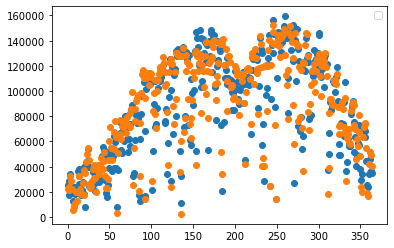

In [25]:
plt.scatter(p1.index,p1['rental'])
plt.scatter(p1.index,p1['rental1'])
plt.legend()
plt.show()

In [26]:
sum(pred['rental'])

31328774.53857422

In [27]:
sum(real_data['rental'])

32054693

No handles with labels found to put in legend.


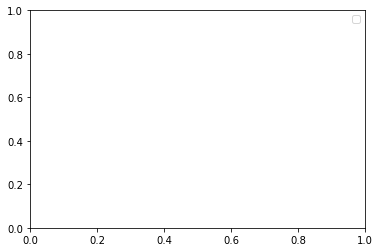

In [28]:
plt.legend()
plt.show()